In [1]:
import cirq
import numpy as np
from cirq.contrib.svg import SVGCircuit
from cirq import Simulator

In [3]:
n = 5
qr = cirq.LineQubit.range(n)
circuit = cirq.Circuit()
circuit.append(cirq.H.on_each(*qr))
for i in range(4):
    circuit.append(cirq.CNOT(qr[i], qr[i+1]))

circuit.append(cirq.SWAP(qr[0], qr[4]))
index = np.random.randint(n)
circuit.append(cirq.rx(rads= np.pi/2).on(qr[index]))

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


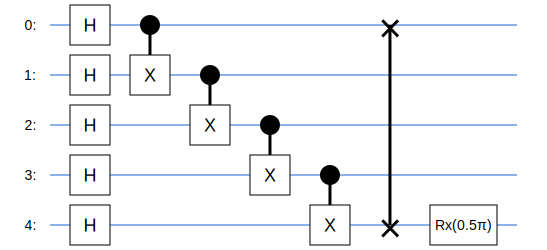

In [4]:
SVGCircuit(circuit)

In [6]:
n = 5
qr = cirq.LineQubit.range(1)
circuit = cirq.Circuit()
total_angle = 0
for i in range(n):
    angle = (np.pi/2)*np.random.uniform(0, 1)
    total_angle += angle
    circuit.append(cirq.rx(rads = angle).on(qr[0]))

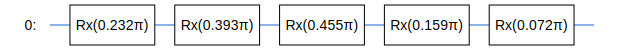

In [7]:
SVGCircuit(circuit)

In [8]:
total_angle/np.pi

1.3109341817261317

In [9]:
sim = Simulator()
repetitions = 10
circuit.append(cirq.measure(qr[0]))
results = sim.run(program=circuit,repetitions=repetitions)

Text(0, 0.5, 'Probabilities')

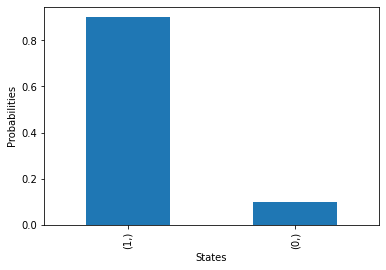

In [10]:
ax = (results.data.value_counts()/repetitions).plot(kind='bar');
ax.set_xlabel("States")
ax.set_ylabel("Probabilities")